In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import  pandas as pd

In [2]:
class ImageDescriptor():
    def __init__(self,bins):
        self.bins=bins
    def describe(self,image):
        image=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
        #plt.imshow(image)
        features=[]
        height,weight=image.shape[:2]
        center_y,center_x=(height//2,weight//2)
        segments=[(0,center_x,0,center_y),(center_x,weight,0,center_y),(center_x,weight,center_y,height),(0,center_x,center_y,height)]
        x_ellipse,y_ellipse=(int(weight*0.75)//2,int(height*0.75)//2)
        ellipMask=np.zeros(image.shape[:2],dtype="uint8")
        cv2.ellipse(ellipMask,(center_x,center_y),(x_ellipse,y_ellipse),0,0,360,255,-1)
        for (sx,ex,sy,ey) in segments:
            CornerMask=np.zeros(image.shape[:2],dtype="uint8")
            cv2.rectangle(CornerMask,(sx,sy),(ex,ey),255,-1)
            cornerMask=cv2.subtract(CornerMask,ellipMask)
            #plt.imshow(cornerMask,cmap='gray')
            hist=self.histogram(image,cornerMask)
            #print(hist)
            features.extend(hist)
        hist=self.histogram(image,cornerMask)
        features.extend(hist)
        return features
    def histogram(self,image,mask):
        hist = cv2.calcHist([image], [0, 1, 2], mask, self.bins,[0, 180, 0, 256, 0, 256])
        #print(hist)
        hist=cv2.normalize(hist,hist).flatten()
        return hist

In [3]:
ID=ImageDescriptor((8,12,3))
results={}
path='E:/Project_Vision/dataset_dss/voiture/'
for imagepath in glob.glob(path+'*.png'):
    ImageID=imagepath[imagepath.rfind("\\")+1:].split('.')[0]
    image=cv2.imread(imagepath)
    features=ID.describe(image)
    results[ImageID]=features

In [4]:
df=pd.DataFrame(results)
len(df)
df=df.unstack(level=0).unstack()
df.index.name="ID"
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
ID,,,,,,,,,,,,,,,,,,,,,
14pm74freefrvoiture,0.000677,0.010528,0.679726,0.002524,0.007881,0.439544,0.005110,0.004433,0.023089,0.014900,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
adesaissetfreefrcubaCUBA41,0.414010,0.014046,0.000000,0.008026,0.053507,0.000000,0.016052,0.072011,0.000000,0.029206,...,0.000000,0.005793,0.000322,0.0,0.008046,0.001609,0.0,0.009977,0.004506,0.0
alpine110freefrvoiture,0.003671,0.023012,0.001341,0.025059,0.072918,0.000424,0.041365,0.111319,0.002471,0.081389,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
aniconcfreefrprestationvoiture20ligue,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000694,0.000000,0.000000,0.001042,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
arnaud91freefrPhotosWeekendMagnyCours2002302Bbelles20voituresVoiture2018,0.002210,0.004052,0.155077,0.006999,0.012524,0.276633,0.015102,0.047149,0.331518,0.013629,...,0.000575,0.000288,0.000575,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [5]:
df.iloc[:4,1:4]

,1,2,3
ID,,,
14pm74freefrvoiture,0.010528,0.679726,0.002524
adesaissetfreefrcubaCUBA41,0.014046,0.000000,0.008026
alpine110freefrvoiture,0.023012,0.001341,0.025059
aniconcfreefrprestationvoiture20ligue,0.000000,0.000000,0.000000


In [6]:
df.to_csv('Features.csv')

In [7]:
df2=pd.read_csv('Features.csv',index_col=0) # specify that column 0 is the index so pandas will not add the range index
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
ID,,,,,,,,,,,,,,,,,,,,,
14pm74freefrvoiture,0.000677,0.010528,0.679726,0.002524,0.007881,0.439544,0.005110,0.004433,0.023089,0.014900,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
adesaissetfreefrcubaCUBA41,0.414010,0.014046,0.000000,0.008026,0.053507,0.000000,0.016052,0.072011,0.000000,0.029206,...,0.000000,0.005793,0.000322,0.0,0.008046,0.001609,0.0,0.009977,0.004506,0.0
alpine110freefrvoiture,0.003671,0.023012,0.001341,0.025059,0.072918,0.000424,0.041365,0.111319,0.002471,0.081389,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
aniconcfreefrprestationvoiture20ligue,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000694,0.000000,0.000000,0.001042,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
arnaud91freefrPhotosWeekendMagnyCours2002302Bbelles20voituresVoiture2018,0.002210,0.004052,0.155077,0.006999,0.012524,0.276633,0.015102,0.047149,0.331518,0.013629,...,0.000575,0.000288,0.000575,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [8]:
features=dict(df2)
print(features)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
df2.iloc[0][0]

0.0006772628403268753

In [10]:
df2.index.values[0]

'14pm74freefrvoiture'

In [11]:
len(f1)

NameError: name 'f1' is not defined

In [12]:
list(f1)
type(f1)

NameError: name 'f1' is not defined

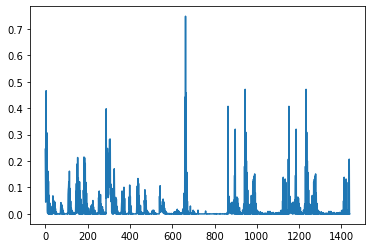

In [13]:
image=cv2.imread('a.png')
ID=ImageDescriptor((8,12,3))
f1=ID.describe(image)
plt.plot(f1)

In [14]:
len(df2)

91

In [15]:
def chi2_distance(histA, histB, eps = 1e-10):
    d = 0.5 * np.sum([((a - b) ** 2) / (a + b + eps) for (a, b) in zip(histA, histB)])
    return d

In [16]:
results={}
for i in range(len(df2)):
    ID=df2.index.values[i]
    f2=list(df2.iloc[i].values)
    r=chi2_distance(f1,f2, eps = 1e-10)
    results[ID]=r
results=sorted([(v,k) for (k,v) in results.items()])

In [21]:
results[0][1]

'pigenakfreefrpersoVoiture'

In [17]:
image=cv2.imread('a.png')
r1=cv2.imread('E:/Project_Vision/dataset_dss/voiture/'+results[0][1]+'.png')
r2=cv2.imread('E:/Project_Vision/dataset_dss/voiture/'+results[1][1]+'.png')
r3=cv2.imread('E:/Project_Vision/dataset_dss/voiture/'+results[2][1]+'.png')
r4=cv2.imread('E:/Project_Vision/dataset_dss/voiture/'+results[3][1]+'.png')
cv2.imshow('Query Image',image)
cv2.imshow('R1',r1)
cv2.imshow('R2',r2)
cv2.imshow('R3',r3)
cv2.imshow('R4',r4)
cv2.waitKey(0)
cv2.destroyAllWindows()

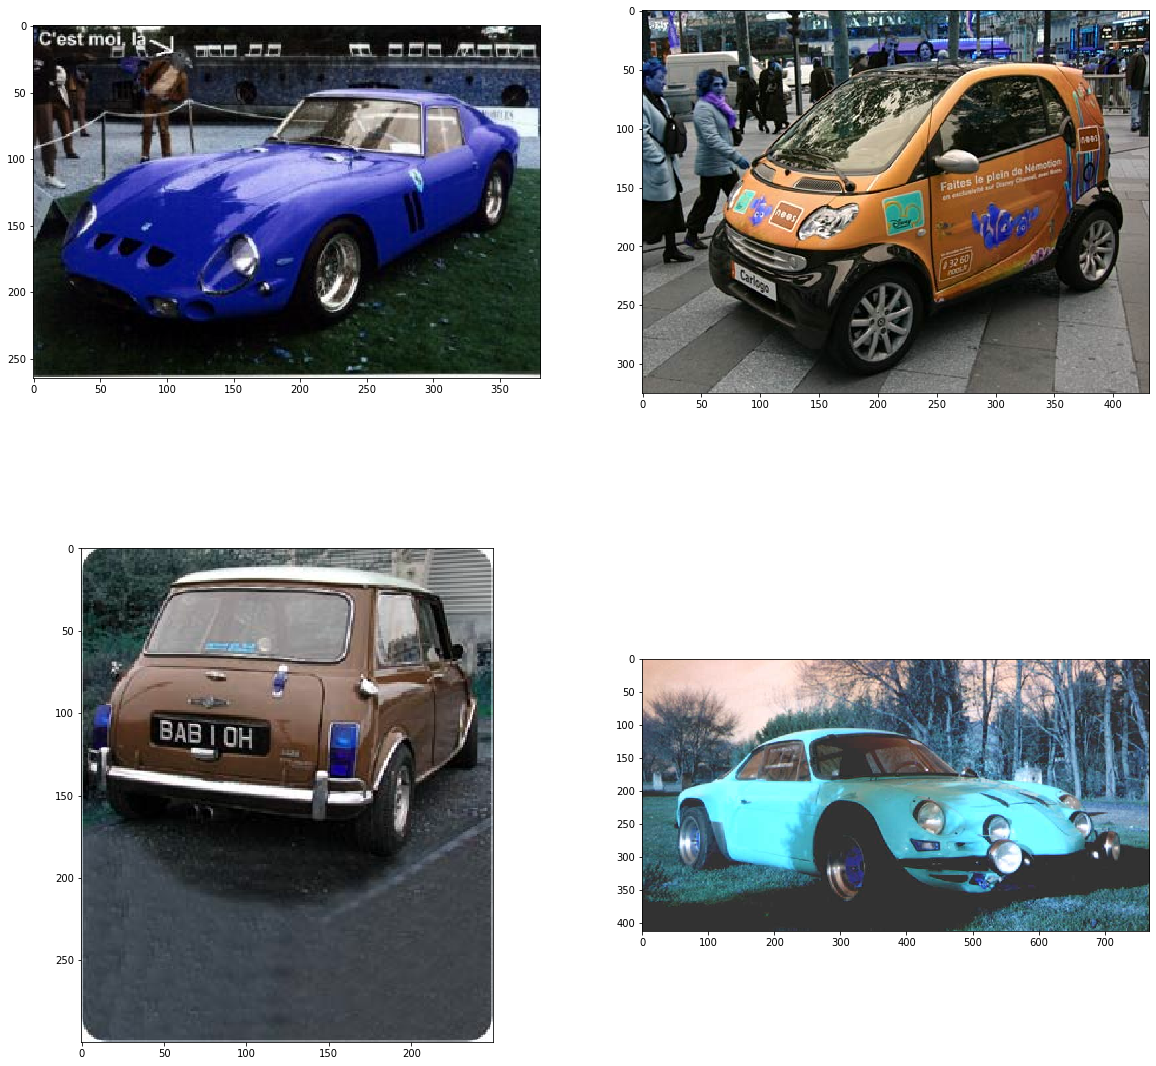

In [28]:
fig = plt.figure(figsize=(20,20))
for i in range(4):
    plt.subplot(2, 2, i+1)
    imagapath='E:/Project_Vision/dataset_dss/voiture/'+results[i][1]+'.png'
    image=cv2.imread(imagapath)
    plt.imshow(image)
plt.show()